## How to Make a Heatmap – a Quick and Easy Solution

This notebook shows how to recreate the heatmap from the article ["How to Make a Heatmap – a Quick and Easy Solution"][1] on the [Flowing Data][2] website.

[1]: http://flowingdata.com/2010/01/21/how-to-make-a-heatmap-a-quick-and-easy-solution/
[2]: http://flowingdata.com

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from urllib2 import urlopen 
import numpy as np

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [2]:
page = urlopen("http://datasets.flowingdata.com/ppg2008.csv")
nba = pd.read_csv(page, index_col=0)

In [3]:
# Normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())
# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
nba_norm.sort('PTS',ascending=True, inplace=True)

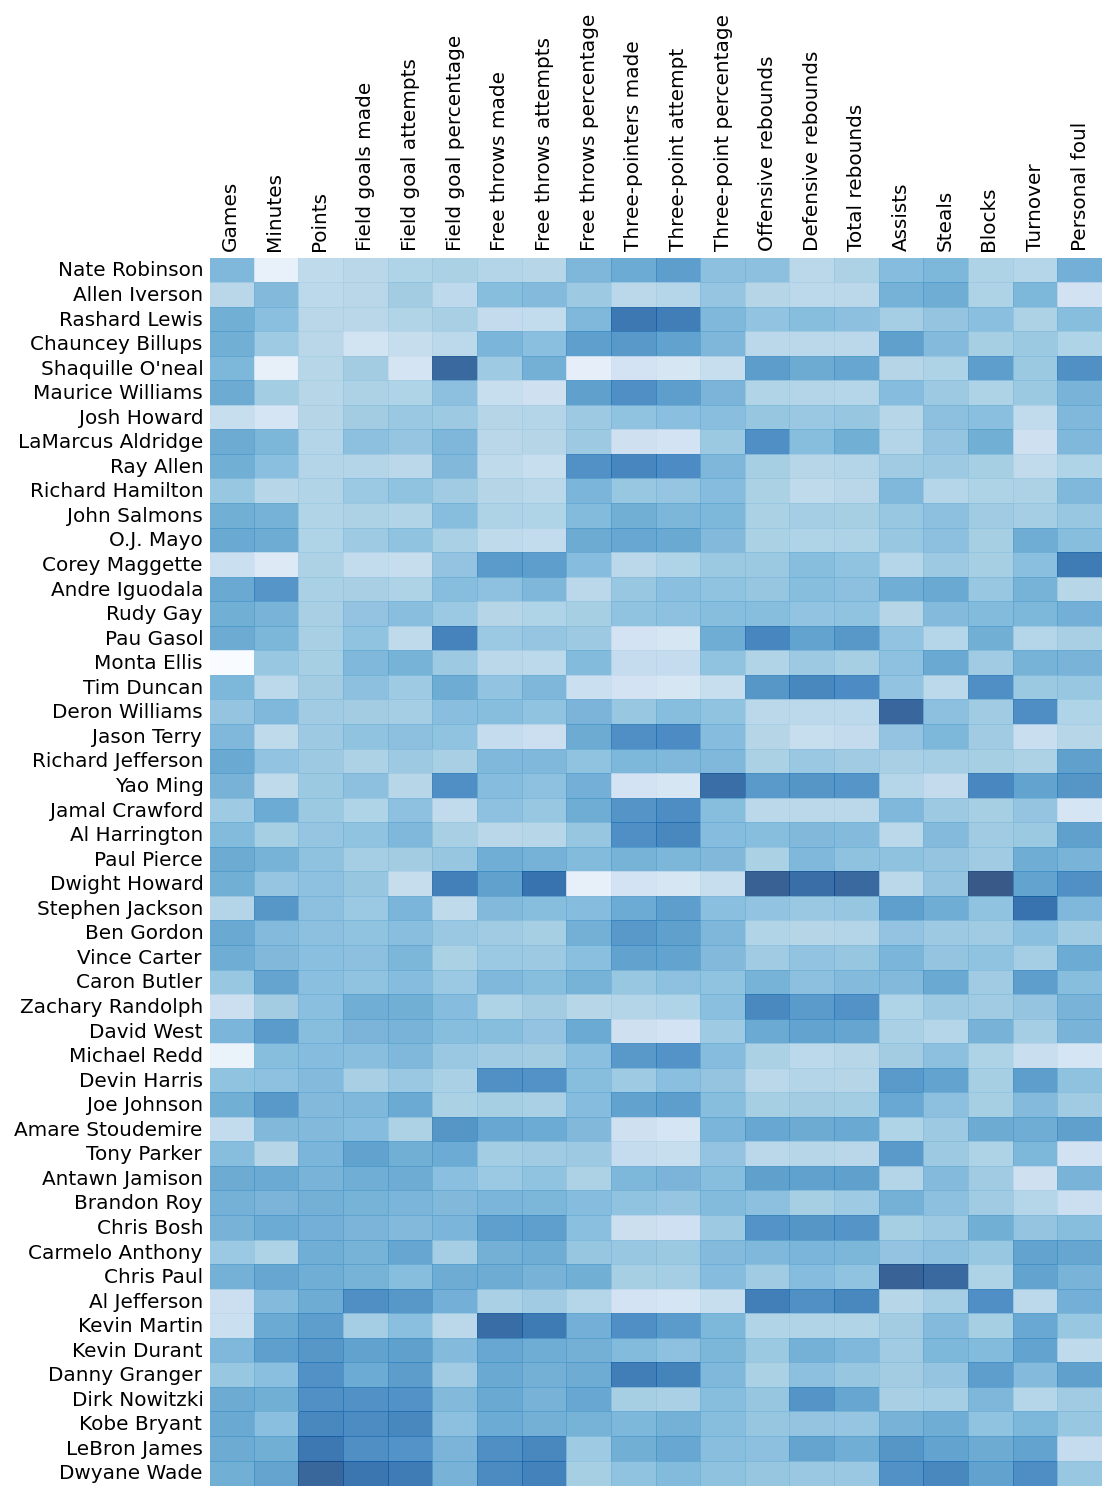

In [7]:
# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(nba_norm, cmap=plt.cm.Blues, alpha=0.8)

##################################################
## FORMAT ##
##################################################

#fig = plt.gcf()
fig.set_size_inches(8,11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(nba_norm.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(nba_norm.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

# label source:https://en.wikipedia.org/wiki/Basketball_statistics
labels = ['Games','Minutes','Points','Field goals made','Field goal attempts','Field goal percentage','Free throws made','Free throws attempts','Free throws percentage','Three-pointers made','Three-point attempt','Three-point percentage','Offensive rebounds','Defensive rebounds','Total rebounds','Assists','Steals','Blocks','Turnover','Personal foul']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False) 
ax.set_yticklabels(nba_norm.index, minor=False)

# rotate the 
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 
for t in ax.yaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 